In [1]:
## Dependencies for Data
import pandas as pd 
import numpy as np 
import json
import ast 
from collections import Counter
## Graphics dependencies
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Inspection

In [2]:
### Paths to the training sets ##
path_Exist21 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2021 EXIST\training\EXIST2021_training.tsv'
path_Exist22 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2022 EXIST\EXIST 2022 Dataset\training\EXIST2021_training.tsv'
path_Exist23 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2023 EXSIT\training\EXIST2023_training.json'
path_Exist24 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2024 EXIST\EXIST 2024 Tweets Dataset\training\EXIST2024_training.json'

In [3]:
### Paths to the test sets ##
test_path_Exist21 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2021 EXIST\test\EXIST2021_test_labeled.tsv'
test_path_Exist22 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2022 EXIST\EXIST 2022 Dataset\test\EXIST2022_test.tsv'
test_path_Exist22_b = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2022 EXIST\EXIST 2022 Dataset\training\EXIST2021_test.tsv'
test_path_Exist23 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2023 EXSIT\test\EXIST2023_test_clean.json'
test_path_Exist24 = r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\2024 EXIST\EXIST 2024 Tweets Dataset\test\EXIST2023_test_clean.json'

In [4]:
## CSV ##

###### Read training set 2021 & 2022 #####
df_21 = pd.read_csv(path_Exist21, sep='\t')
df_22 = pd.read_csv(path_Exist22, sep='\t')

###### Read test set 2021 & 2022 #####
test_df_21 = pd.read_csv(test_path_Exist21, sep='\t')
test_df_22 = pd.read_csv(test_path_Exist22, sep='\t')  # This dataset does not include labels

## JSON ##

###### Read training set 2023 #####

with open(path_Exist23, 'r', encoding='utf-8') as f:
    data_23 = json.load(f)

# Convert to DataFrame with proper structure
df_23 = pd.DataFrame.from_dict(data_23, orient='index')
df_23.reset_index(inplace=True) 
df_23.rename(columns={'index': 'tweet_id'}, inplace=True) 

###### Read test set 2023 #####

with open(test_path_Exist23, 'r', encoding='utf-8') as file:
    test_data_23 = json.load(file)

# Convert to DataFrame with proper structure
test_df_23 = pd.DataFrame.from_dict(test_data_23, orient='index')
test_df_23.reset_index(inplace=True)
test_df_23.rename(columns={'index': 'tweet_id'}, inplace=True)


###### Read training set 2024 #####

with open(path_Exist24, 'r', encoding='utf-8') as file:
    data_24 = json.load(file)

# Convert to DataFrame with proper structure
df_24 = pd.DataFrame.from_dict(data_24, orient='index')
df_24.reset_index(inplace=True)
df_24.rename(columns={'index': 'tweet_id'}, inplace=True)

###### Read test set 2024 #####

with open(test_path_Exist24, 'r', encoding='utf-8') as file:
    test_data_24 = json.load(file)

# Convert to DataFrame with proper structure
test_df_24 = pd.DataFrame.from_dict(test_data_24, orient='index')
test_df_24.reset_index(inplace=True)
test_df_24.rename(columns={'index': 'tweet_id'}, inplace=True)


########  Summary dataframes #####

    # 'Dataset training 2021': df_21,
    # 'Dataset training 2022': df_22,
    # 'Dataset training 2023': df_23,
    # 'Dataset training 2021': df_24,
    # 'Dataset test 2021':  test_df_21,
    # 'Dataset test 2021':  test_df_22,
    # 'Dataset test 2021':  test_df_23,
    # 'Dataset test 2021':  test_df_24
    # Training sets of 2021 and 2022 are the same. Same with the dataset for training 2023 and 2024.




In [10]:
df_21.info()
print(df_21["task1"].value_counts())
print(df_21["task2"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6977 entries, 0 to 6976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   test_case  6977 non-null   object
 1   id         6977 non-null   int64 
 2   source     6977 non-null   object
 3   language   6977 non-null   object
 4   text       6977 non-null   object
 5   task1      6977 non-null   object
 6   task2      6977 non-null   object
dtypes: int64(1), object(6)
memory usage: 381.7+ KB
task1
non-sexist    3600
sexist        3377
Name: count, dtype: int64
task2
non-sexist                      3600
ideological-inequality           866
stereotyping-dominance           809
misogyny-non-sexual-violence     685
sexual-violence                  517
objectification                  500
Name: count, dtype: int64


In [13]:
df_23.info()
print(df_23["labels_task1"].value_counts())
print(df_23["labels_task3"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           6920 non-null   object
 1   id_EXIST           6920 non-null   object
 2   lang               6920 non-null   object
 3   tweet              6920 non-null   object
 4   number_annotators  6920 non-null   int64 
 5   annotators         6920 non-null   object
 6   gender_annotators  6920 non-null   object
 7   age_annotators     6920 non-null   object
 8   labels_task1       6920 non-null   object
 9   labels_task2       6920 non-null   object
 10  labels_task3       6920 non-null   object
 11  split              6920 non-null   object
dtypes: int64(1), object(11)
memory usage: 648.9+ KB
labels_task1
[NO, NO, NO, NO, NO, NO]          1434
[YES, YES, YES, YES, YES, YES]     815
[NO, NO, NO, YES, NO, NO]          213
[NO, NO, NO, NO, YES, NO]          201
[NO, NO, NO, 

In [ ]:
# We select a random item to isnpect 
random_instance = df_21.sample(n=1, random_state=42)

print('**** INPUT ****')
print(random_instance['text'].iloc[0])


print('*** TARGET ****')
print(random_instance['task1'].iloc[0]) 

**** INPUT ****
@BulnesUno @sotoadaltres No es que no de ni una..., es que es otra analfabeta florero de Sánchez...Maldad, como todas las mujeres que hay en el gobierno..., y digo maldad, no porque tenga nada en contra de la mujer, faltaría más, si no porque mienten a propósito y haciendo daño..., como la Celaaaaaaaá.
*** TARGET ****
sexist


In [ ]:
# Same for test data : 
test_df_21.info()
print(test_df_21["task1"].value_counts())
print(test_df_21["task2"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   test_case  4368 non-null   object
 1   id         4368 non-null   int64 
 2   source     4368 non-null   object
 3   language   4368 non-null   object
 4   text       4368 non-null   object
 5   task1      4368 non-null   object
 6   task2      4368 non-null   object
dtypes: int64(1), object(6)
memory usage: 239.0+ KB
task1
sexist        2281
non-sexist    2087
Name: count, dtype: int64
task2
non-sexist                      2087
ideological-inequality           621
misogyny-non-sexual-violence     472
stereotyping-dominance           464
sexual-violence                  400
objectification                  324
Name: count, dtype: int64


In [26]:
test_df_23.info()
# In the test of 23, was not included the labels.  They have to be predicted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2076 non-null   object
 1   id_EXIST  2076 non-null   object
 2   lang      2076 non-null   object
 3   tweet     2076 non-null   object
 4   split     2076 non-null   object
dtypes: object(5)
memory usage: 81.2+ KB


In [27]:
test_df_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 2076 non-null   object
 1   id_EXIST                 2076 non-null   object
 2   lang                     2076 non-null   object
 3   tweet                    2076 non-null   object
 4   number_annotators        2076 non-null   int64 
 5   annotators               2076 non-null   object
 6   gender_annotators        2076 non-null   object
 7   age_annotators           2076 non-null   object
 8   ethnicities_annotators   2076 non-null   object
 9   study_levels_annotators  2076 non-null   object
 10  countries_annotators     2076 non-null   object
 11  split                    2076 non-null   object
dtypes: int64(1), object(11)
memory usage: 194.8+ KB


In [ ]:
# print("Shapes of the datasets:")
# print(f"Training set 2021: {df_21.shape}")
# print(f"Training set 2022: {df_22.shape}")  
# print(f"Training set 2023: {df_23.shape}")
# print(f"Training set 2024: {df_24.shape}")
# print(f"Test set 2021: {test_df_21.shape}")
# print(f"Test set 2022: {test_df_22.shape}")
# print(f"Test set 2023: {test_df_23.shape}")
# print(f"Test set 2024: {test_df_24.shape}")

Shapes of the datasets:
Training set 2021: (6977, 7)
Training set 2022: (6977, 7)
Training set 2023: (6920, 12)
Training set 2024: (6920, 15)
Test set 2021: (4368, 7)
Test set 2022: (1035, 5)
Test set 2023: (2076, 5)
Test set 2024: (2076, 12)


In [ ]:
print(df_21.head(2))
print(df_22.head(2))

   test_case  id   source language  \
0  EXIST2021   1  twitter       en   
1  EXIST2021   2  twitter       en   

                                                text       task1  \
0  She calls herself "anti-feminazi" how about sh...      sexist   
1  Now, back to these women, the brave and the be...  non-sexist   

                    task2  
0  ideological-inequality  
1              non-sexist  
   test_case  id   source language  \
0  EXIST2021   1  twitter       en   
1  EXIST2021   2  twitter       en   

                                                text       task1  \
0  She calls herself "anti-feminazi" how about sh...      sexist   
1  Now, back to these women, the brave and the be...  non-sexist   

                    task2  
0  ideological-inequality  
1              non-sexist  


In [ ]:
# df_21.shape
# df_21.info()
# df_21.describe()
# df_21.isna().sum()
# df_21.duplicated().sum()
# print(df_21['task1'].value_counts())
# df_21['task2'].value_counts()


In [ ]:
# Display information about df_23 DataFrame
df_23.head(2)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
0,100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
1,100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES


In [ ]:
# I am exttracting the labels for task 3 from both datasets, since they are in a list format with the different classes that have been tagged for each tweet.
labels_23 = df_23['labels_task3']
labels_24 = df_24['labels_task3']

In [ ]:
### V2 ### 

# Count individual class occurrences (not combinations)

# Function to flatten nested lists and extract individual elements
def flatten_and_extract(x):
    if isinstance(x, str):
        try:
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list):
                return [item for item in parsed if item != '-']
            else:
                return [parsed] if parsed != '-' else []
        except:
            return [x] if x != '-' else []
    elif isinstance(x, list):
        # Handle nested lists - flatten them
        result = []
        for item in x:
            if isinstance(item, list):
                result.extend([subitem for subitem in item if subitem != '-'])
            elif item != '-':
                result.append(item)
        return result
    else:
        return [x] if pd.notnull(x) and x != '-' else []

# Apply the function to normalize and flatten
flattened_23 = labels_23.apply(flatten_and_extract)
flattened_24 = labels_24.apply(flatten_and_extract)

# Now explode to get individual class counts
individual_class_counts_23 = flattened_23.explode().value_counts()
individual_class_counts_24 = flattened_24.explode().value_counts()



print("Individual class counts (each class counted every time it appears):")
print("Dataframe 2023:", individual_class_counts_23)
print("Dataframe 2024:", individual_class_counts_24)

print("\n" + "="*60)

# Also show how many tweets contain each class (presence-based counting)
all_individual_classes = []
for item_list in flattened_23:
    all_individual_classes.extend(item_list)

unique_classes = set(all_individual_classes)
tweet_presence_counts = {}

for class_name in unique_classes:
    count = sum(1 for item_list in flattened_23 if class_name in item_list)
    tweet_presence_counts[class_name] = count

# Sort by count
sorted_presence = dict(sorted(tweet_presence_counts.items(), key=lambda x: x[1], reverse=True))

print("Number of tweets containing each class (presence-based):")
for class_name, count in sorted_presence.items():
    print(f"{class_name}: {count}")

Individual class counts (each class counted every time it appears):
Dataframe 2023: labels_task3
STEREOTYPING-DOMINANCE          6770
IDEOLOGICAL-INEQUALITY          5830
OBJECTIFICATION                 5237
MISOGYNY-NON-SEXUAL-VIOLENCE    4130
SEXUAL-VIOLENCE                 3274
UNKNOWN                          227
Name: count, dtype: int64
Dataframe 2024: labels_task3
STEREOTYPING-DOMINANCE          6770
IDEOLOGICAL-INEQUALITY          5830
OBJECTIFICATION                 5237
MISOGYNY-NON-SEXUAL-VIOLENCE    4130
SEXUAL-VIOLENCE                 3274
UNKNOWN                          227
Name: count, dtype: int64

Number of tweets containing each class (presence-based):
STEREOTYPING-DOMINANCE: 3536
IDEOLOGICAL-INEQUALITY: 3193
OBJECTIFICATION: 2907
MISOGYNY-NON-SEXUAL-VIOLENCE: 2460
SEXUAL-VIOLENCE: 1740
UNKNOWN: 224


In [ ]:
#The same for the test sets of 2023 and 2024: 

labels_23 = df_23['labels_task3']
labels_24 = df_24['labels_task3']

# Apply the function to normalize and flatten
flattened_23 = labels_23.apply(flatten_and_extract)
flattened_24 = labels_24.apply(flatten_and_extract)

# Now explode to get individual class counts
individual_class_counts_23 = flattened_23.explode().value_counts()
individual_class_counts_24 = flattened_24.explode().value_counts()



print("Individual class counts (each class counted every time it appears):")
print("Dataframe 2023:", individual_class_counts_23)
print("Dataframe 2024:", individual_class_counts_24)

print("\n" + "="*60)

# Also show how many tweets contain each class (presence-based counting)
all_individual_classes = []
for item_list in flattened_23:
    all_individual_classes.extend(item_list)

unique_classes = set(all_individual_classes)
tweet_presence_counts = {}

for class_name in unique_classes:
    count = sum(1 for item_list in flattened_23 if class_name in item_list)
    tweet_presence_counts[class_name] = count

# Sort by count
sorted_presence = dict(sorted(tweet_presence_counts.items(), key=lambda x: x[1], reverse=True))

print("Number of tweets containing each class (presence-based):")
for class_name, count in sorted_presence.items():
    print(f"{class_name}: {count}")



Individual class counts (each class counted every time it appears):
Dataframe 2023: labels_task3
STEREOTYPING-DOMINANCE          6770
IDEOLOGICAL-INEQUALITY          5830
OBJECTIFICATION                 5237
MISOGYNY-NON-SEXUAL-VIOLENCE    4130
SEXUAL-VIOLENCE                 3274
UNKNOWN                          227
Name: count, dtype: int64
Dataframe 2024: labels_task3
STEREOTYPING-DOMINANCE          6770
IDEOLOGICAL-INEQUALITY          5830
OBJECTIFICATION                 5237
MISOGYNY-NON-SEXUAL-VIOLENCE    4130
SEXUAL-VIOLENCE                 3274
UNKNOWN                          227
Name: count, dtype: int64

Number of tweets containing each class (presence-based):
STEREOTYPING-DOMINANCE: 3536
IDEOLOGICAL-INEQUALITY: 3193
OBJECTIFICATION: 2907
MISOGYNY-NON-SEXUAL-VIOLENCE: 2460
SEXUAL-VIOLENCE: 1740
UNKNOWN: 224


In [ ]:
# Working with the labels_task2 data (already in list format)
# Let's explore the labels and create aggregated versions

# Function to get the most common label (majority vote)
from collections import Counter

def get_majority_label(label_list):
    # Remove '-' (non-labels) and count remaining labels
    valid_labels = [label for label in label_list if label != '-']
    if not valid_labels:
        return 'NO_LABEL'
    counter = Counter(valid_labels)
    return counter.most_common(1)[0][0]

# Apply majority voting to get a single label per tweet
df_23['task2_majority'] = df_23['labels_task2'].apply(get_majority_label)

# Show the results
print("Distribution of majority labels for Task 2:")
print(df_23['task2_majority'].value_counts())
print("\nFirst few rows with original and majority labels:")
print(df_23[['tweet_id', 'labels_task2', 'task2_majority']].head())

Distribution of majority labels for Task 2:
task2_majority
DIRECT         2759
NO_LABEL       1434
JUDGEMENTAL    1378
REPORTED       1332
UNKNOWN          17
Name: count, dtype: int64

First few rows with original and majority labels:
  tweet_id                                       labels_task2 task2_majority
0   100001  [REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...       REPORTED
1   100002                            [-, -, -, -, DIRECT, -]         DIRECT
2   100003                                 [-, -, -, -, -, -]       NO_LABEL
3   100004              [-, -, DIRECT, -, REPORTED, REPORTED]       REPORTED
4   100005  [REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...    JUDGEMENTAL


## Ghraphics : 

C:\Users\claud\AppData\Local\Temp\ipykernel_19404\2023369006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_21.explode("task1"), x="task1",ax=axes[0],order=order,palette="viridis")
C:\Users\claud\AppData\Local\Temp\ipykernel_19404\2023369006.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_22.explode("task1"), x="task1",ax=axes[1],order=order,palette="viridis")


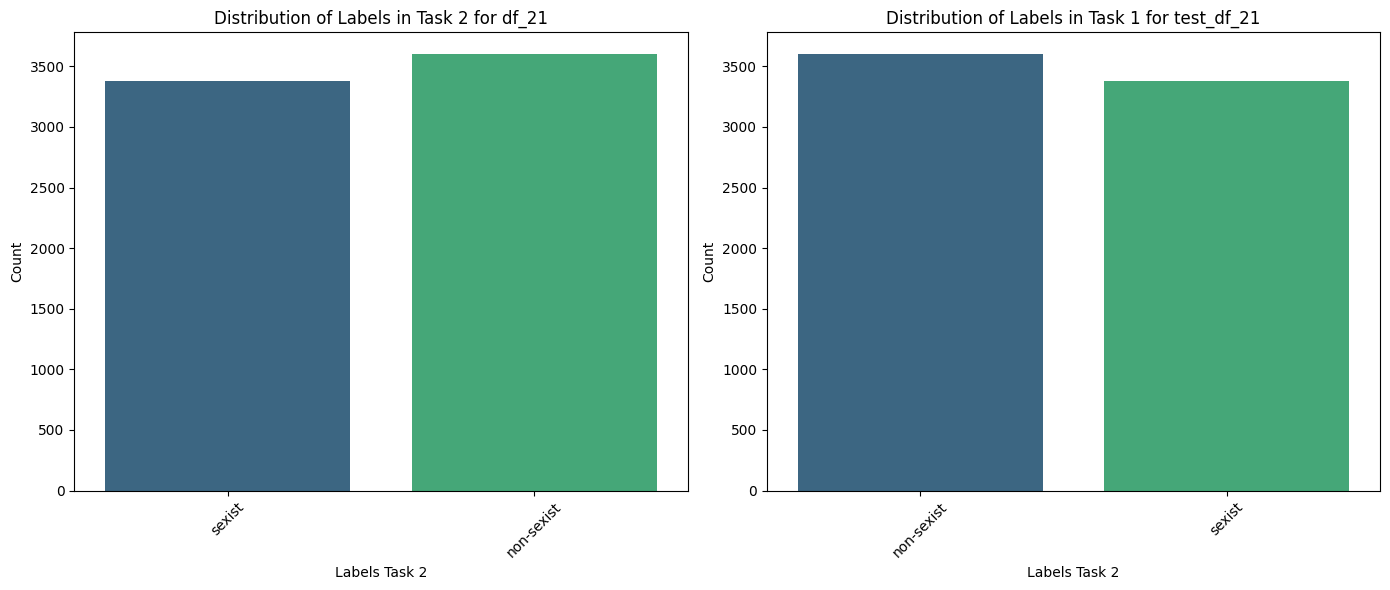

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Data distribution from the first dataframe

# order = df_21['task2'].explode().value_counts().index
order = df_21['task1'].explode().value_counts().sort_values(ascending=True).index
sns.countplot(data=df_21.explode("task1"), x="task1",ax=axes[0],order=order,palette="viridis")
axes[0].set_title('Distribution of Labels in Task 2 for df_21')
axes[0].set_xlabel('Labels Task 2')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Data distribution from the second dataframe
order = test_df_21['task1'].explode().value_counts().sort_values(ascending=True).index
sns.countplot(data=df_22.explode("task1"), x="task1",ax=axes[1],order=order,palette="viridis")
axes[1].set_title('Distribution of Labels in Task 1 for test_df_21')
axes[1].set_xlabel('Labels Task 2')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()

C:\Users\claud\AppData\Local\Temp\ipykernel_19404\1023133042.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_21.explode("task2"), x="task2",ax=axes[0],order=order,palette="viridis")
C:\Users\claud\AppData\Local\Temp\ipykernel_19404\1023133042.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_22.explode("task2"), x="task2",ax=axes[1],order=order,palette="viridis")


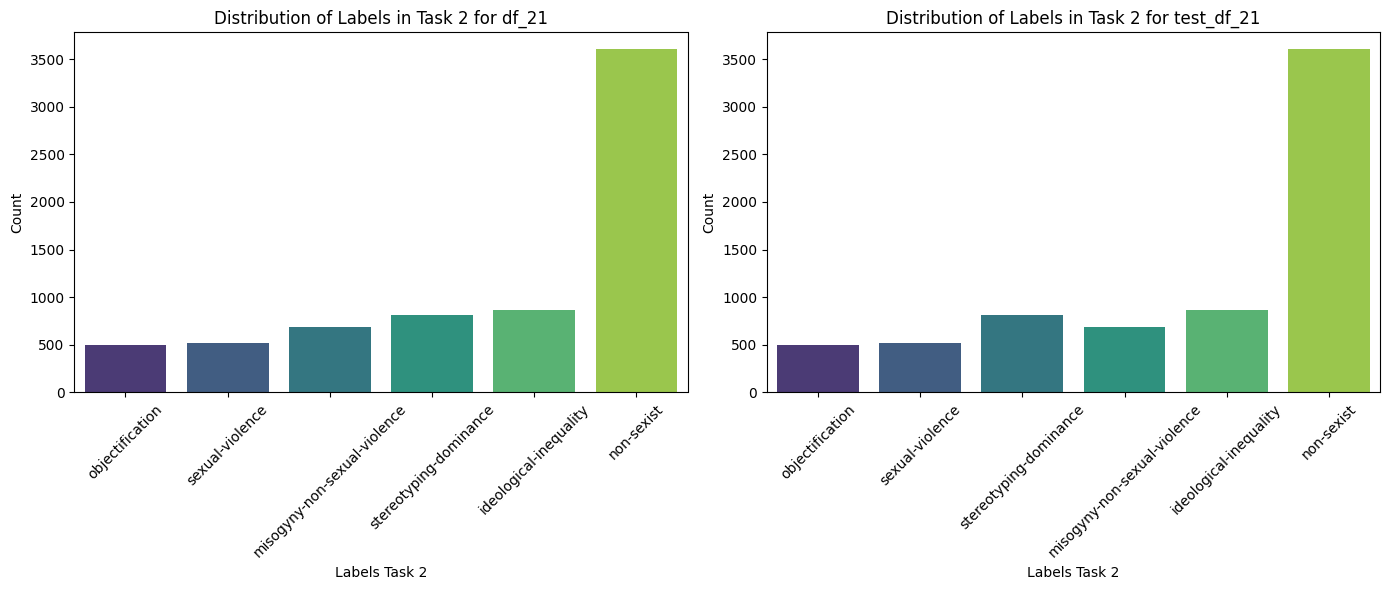

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Data distribution from the first dataframe

# order = df_21['task2'].explode().value_counts().index
order = df_21['task2'].explode().value_counts().sort_values(ascending=True).index
sns.countplot(data=df_21.explode("task2"), x="task2",ax=axes[0],order=order,palette="viridis")
axes[0].set_title('Distribution of Labels in Task 2 for df_21')
axes[0].set_xlabel('Labels Task 2')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Data distribution from the second dataframe
order = test_df_21['task2'].explode().value_counts().sort_values(ascending=True).index
sns.countplot(data=df_22.explode("task2"), x="task2",ax=axes[1],order=order,palette="viridis")
axes[1].set_title('Distribution of Labels in Task 2 for test_df_21')
axes[1].set_xlabel('Labels Task 2')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()


C:\Users\claud\AppData\Local\Temp\ipykernel_19404\1898303257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\claud\AppData\Local\Temp\ipykernel_19404\1898303257.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


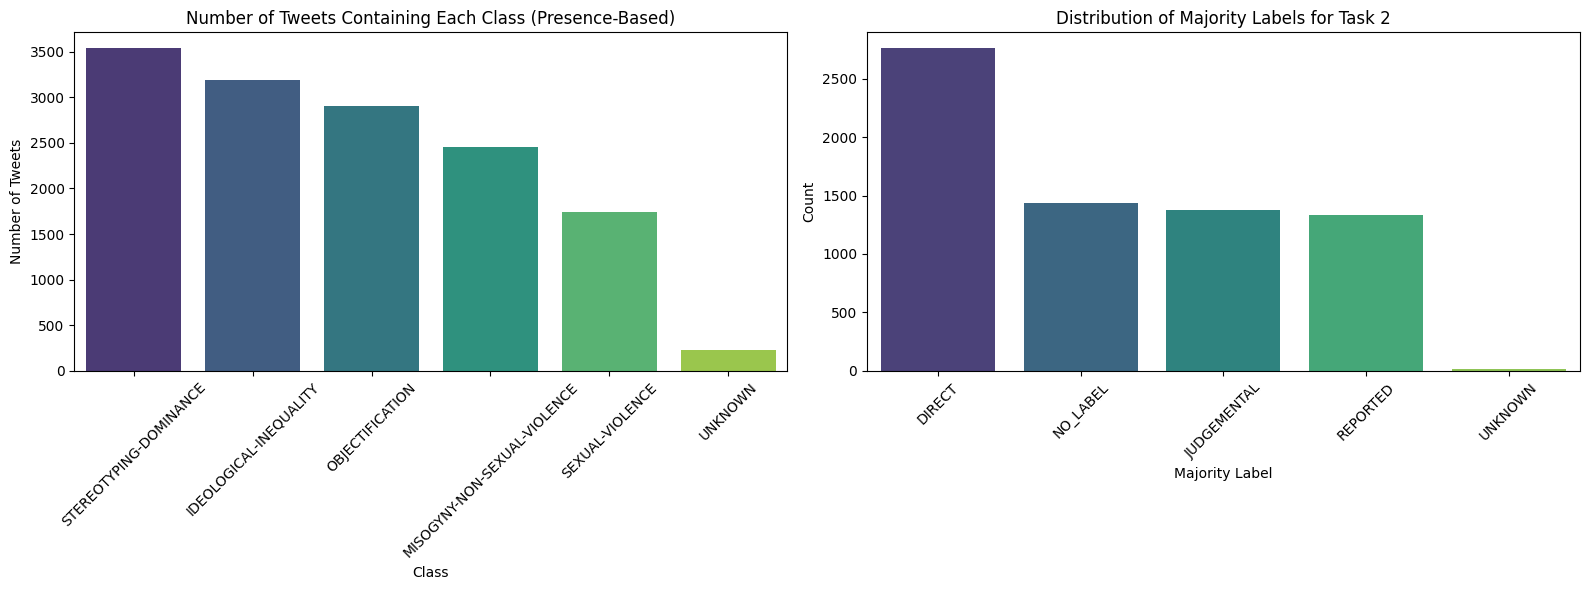

In [ ]:
# Crear figura con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Primera gráfica: sorted_presence ---
sns.barplot(
    x=list(sorted_presence.keys()), 
    y=list(sorted_presence.values()), 
    palette='viridis', 
    ax=axes[0]
)
axes[0].set_title('Number of Tweets Containing Each Class (Presence-Based)')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Tweets')
axes[0].tick_params(axis='x', rotation=45)

# --- Segunda gráfica: Majority labels ---
sns.countplot(
    data=df_23, 
    x='task2_majority', 
    order=df_23['task2_majority'].value_counts().index, 
    palette='viridis', 
    ax=axes[1]
)
axes[1].set_title('Distribution of Majority Labels for Task 2')
axes[1].set_xlabel('Majority Label')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#### Checkint the new columns added to the test sets of 2024:
test_df_23.head(2)


,tweet_id,id_EXIST,lang,tweet,split
0,500001,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,TEST_ES
1,500002,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",TEST_ES


In [ ]:
test_df_24.head(2)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,split
0,500001,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,6,"[Annotator_810, Annotator_811, Annotator_812, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, White or Caucasian, White ...","[High school degree or equivalent, Master’s de...","[Mexico, Spain, Italy, United States, Portugal...",TEST_ES
1,500002,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",6,"[Annotator_780, Annotator_816, Annotator_817, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[Hispano or Latino, Hispano or Latino, Black o...","[High school degree or equivalent, Bachelor’s ...","[Chile, Mexico, United States, Mexico, Mexico,...",TEST_ES


# Homogenize text Dataset

In [ ]:
df_21.head(2)

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist


In [ ]:
df_23.head(2)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,task2_majority
0,100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,REPORTED
1,100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,DIRECT


In [ ]:
# List with all label types:
label_task1 = df_21['task1'].unique().tolist()
label_task2 = df_21['task2'].unique().tolist()

In [ ]:
print("Unique labels in Task 1:", label_task1)
print("Unique labels in Task 2:", label_task2)

Unique labels in Task 1: ['sexist', 'non-sexist']
Unique labels in Task 2: ['ideological-inequality', 'non-sexist', 'objectification', 'sexual-violence', 'stereotyping-dominance', 'misogyny-non-sexual-violence']


In [ ]:
# Create new column in df_21 called label_task1 with a one hot encoding for task1 labels (O IF "non-sexist" , else 1)
df_21['label_task1'] = df_21['task1'].apply(lambda x: 0 if x == 'non-sexist' else 1)

In [ ]:
# First, let's see what unique labels we have in task2
print("Unique labels in task2:")
print(df_21['task2'].value_counts())

# Create a proper label encoding for task2
# Option 1: Multi-class encoding (0, 1, 2, 3...)
label_mapping_task2 = {
    'non-sexist': 0,
    'ideological-inequality': 1, 
    'stereotyping-dominance': 2,
    'objectification': 3,
    'sexual-violence': 4,
    'misogyny-non-sexual-violence': 5
}


# same for task 1, we want [0.0,1.0] if sexist and [1.0,0.0] if non-sexist in label_task1: 
# Ensure types are float because we are gonna need it for our soft labels solution 
df_21['task1_soft_one_hot'] = df_21['label_task1'].apply(lambda x: [1.0,0.0] if x == 0 else [0.0,1.0])
df_21.head(2)

df_21['task2_econding'] = df_21['task2'].map(label_mapping_task2)
print("###########################")
print("After multiclass encoding:")
df_21.head(10)

# create a one-hot encoding for task2 if the value in task2_encoding is 0 1 in the first position of the vector, if 1 in the second position, etc.
df_21['task2_soft_one_hot'] = df_21['task2_econding'].apply(lambda x: [1.0 if i == x else 0.0 for i in range(6)])

df_21.head(2)




Unique labels in task2:
task2
non-sexist                      3600
ideological-inequality           866
stereotyping-dominance           809
misogyny-non-sexual-violence     685
sexual-violence                  517
objectification                  500
Name: count, dtype: int64
###########################
After multiclass encoding:


,test_case,id,source,language,text,task1,task2,label_task1,task1_soft_one_hot,task2_econding,task2_soft_one_hot
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality,1,"[0.0, 1.0]",1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
type(df_23['labels_task1'][0])
df_23['labels_task1'][0]
# For each row in df_23, and labels_task1 column, i want to create a new column called task1_soft_one_hot with the distribution of yes and noes in a list of two elements [no, yes]
df_23['task1_soft_one_hot'] = df_23['labels_task1'].apply(lambda x: [x.count('NO')/len(x), x.count('YES')/len(x)] if len(x) > 0 else [1,0])
df_23.head(2)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,task2_majority,task1_soft_one_hot
0,100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,REPORTED,"[0.16666666666666666, 0.8333333333333334]"
1,100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,DIRECT,"[0.8333333333333334, 0.16666666666666666]"


In [ ]:
# First, let's examine the structure of labels_task3 to understand the data format
print("Sample of labels_task3 data:")
print(df_23['labels_task3'].head(10).tolist())
print("\nData types in labels_task3:")
print([type(x) for x in df_23['labels_task3'].head(10)])

# Function to handle nested lists and flatten them before mapping
def flatten_and_map_labels(x, mapping_dict):
    if not isinstance(x, list):
        return []
    
    # Flatten nested lists
    flattened = []
    for item in x:
        if isinstance(item, list):
            flattened.extend(item)
        else:
            flattened.append(item)
    
    # Remove '-' and map valid labels
    valid_labels = [item for item in flattened if item != '-' and item in mapping_dict]
    return [mapping_dict[label] for label in valid_labels]

# Updated label mapping dictionary
label_mapping_task2 = {
    'NON-SEXIST': 0,
    'IDEOLOGICAL-INEQUALITY': 1, 
    'STEREOTYPING-DOMINANCE': 2,
    'OBJECTIFICATION': 3,
    'SEXUAL-VIOLENCE': 4,
    'MISOGYNY-NON-SEXUAL-VIOLENCE': 5
}

# Apply the fixed function
df_23['task3_encoding'] = df_23['labels_task3'].apply(lambda x: flatten_and_map_labels(x, label_mapping_task2))

# Check the results
print("\nFirst few rows of task3_encoding:")
print(df_23[['labels_task3', 'task3_encoding']].head())

Sample of labels_task3 data:
[[['OBJECTIFICATION'], ['OBJECTIFICATION', 'SEXUAL-VIOLENCE'], ['-'], ['STEREOTYPING-DOMINANCE'], ['SEXUAL-VIOLENCE'], ['IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE']], [['-'], ['-'], ['-'], ['-'], ['OBJECTIFICATION'], ['-']], [['-'], ['-'], ['-'], ['-'], ['-'], ['-']], [['-'], ['-'], ['IDEOLOGICAL-INEQUALITY'], ['-'], ['IDEOLOGICAL-INEQUALITY'], ['IDEOLOGICAL-INEQUALITY', 'OBJECTIFICATION', 'SEXUAL-VIOLENCE']], [['STEREOTYPING-DOMINANCE', 'OBJECTIFICATION'], ['-'], ['IDEOLOGICAL-INEQUALITY', 'OBJECTIFICATION'], ['-'], ['IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMINANCE'], ['STEREOTYPING-DOMINANCE', 'OBJECTIFICATION']], [['-'], ['-'], ['-'], ['-'], ['-'], ['-']], [['-'], ['UNKNOWN'], ['MISOGYNY-NON-SEXUAL-VIOLENCE'], ['-'], ['-'], ['MISOGYNY-NON-SEXUAL-VIOLENCE']], [['IDEOLOGICAL-INEQUALITY'], ['STEREOTYPING-DOMINANCE', 'OBJECTIFICATION'], ['IDEOLOGICAL-INEQUALITY', 'MISOGYNY-NON-SEXUAL-VIOLENCE'], ['IDEOLOGICAL-INEQUALITY'], ['STEREOTYPING-DOMINA

In [ ]:
df_23.head(2)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,task2_majority,task1_soft_one_hot,task3_encoding
0,100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,REPORTED,"[0.16666666666666666, 0.8333333333333334]","[3, 3, 4, 2, 4, 1, 5]"
1,100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,DIRECT,"[0.8333333333333334, 0.16666666666666666]",[3]


In [ ]:
# Create soft one-hot encoding for task3 based on the encoded values (0,1,2,3,4,5)
def create_task3_soft_encoding(encoded_list):
    if not encoded_list:  # If empty list
        return [0, 0, 0, 0, 0, 0]  # Return zeros for all 6 classes
    
    total_labels = len(encoded_list)
    # Count occurrences of each class (0-5)
    class_counts = [0, 0, 0, 0, 0, 0]
    
    for label in encoded_list:
        if 0 <= label <= 5:  # Make sure it's a valid class
            class_counts[label] += 1
    
    # Convert counts to proportions
    proportions = [count/total_labels for count in class_counts]
    return proportions

# Apply the function to create soft one-hot encoding
df_23['task3_soft_one_hot'] = df_23['task3_encoding'].apply(create_task3_soft_encoding)

# Check the results
print("First few rows of task3_soft_one_hot:")
print(df_23[['task3_encoding', 'task3_soft_one_hot']].head())

# Show what each position represents
print("\nClass mapping for task3_soft_one_hot positions:")
print("Position 0: NON-SEXIST")
print("Position 1: IDEOLOGICAL-INEQUALITY") 
print("Position 2: STEREOTYPING-DOMINANCE")
print("Position 3: OBJECTIFICATION")
print("Position 4: SEXUAL-VIOLENCE")
print("Position 5: MISOGYNY-NON-SEXUAL-VIOLENCE")

First few rows of task3_soft_one_hot:
             task3_encoding                                 task3_soft_one_hot
0     [3, 3, 4, 2, 4, 1, 5]  [0.0, 0.14285714285714285, 0.14285714285714285...
1                       [3]                     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
2                        []                                 [0, 0, 0, 0, 0, 0]
3           [1, 1, 1, 3, 4]                     [0.0, 0.6, 0.0, 0.2, 0.2, 0.0]
4  [2, 3, 1, 3, 1, 2, 2, 3]                [0.0, 0.25, 0.375, 0.375, 0.0, 0.0]

Class mapping for task3_soft_one_hot positions:
Position 0: NON-SEXIST
Position 1: IDEOLOGICAL-INEQUALITY
Position 2: STEREOTYPING-DOMINANCE
Position 3: OBJECTIFICATION
Position 4: SEXUAL-VIOLENCE
Position 5: MISOGYNY-NON-SEXUAL-VIOLENCE


In [ ]:
df_23.head(3)

,tweet_id,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,task2_majority,task1_soft_one_hot,task3_encoding,task3_soft_one_hot
0,100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,REPORTED,"[0.16666666666666666, 0.8333333333333334]","[3, 3, 4, 2, 4, 1, 5]","[0.0, 0.14285714285714285, 0.14285714285714285..."
1,100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,DIRECT,"[0.8333333333333334, 0.16666666666666666]",[3],"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
2,100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES,NO_LABEL,"[1.0, 0.0]",[],"[0, 0, 0, 0, 0, 0]"


In [ ]:
# delete columns number_annotators	annotators	gender_annotators	age_annotators	labels_task1	labels_task2	labels_task3	split	task2_majority
df_23 = df_23.drop(columns=['number_annotators','annotators','gender_annotators','age_annotators','labels_task1','labels_task2','labels_task3','split','task2_majority'])

In [28]:
#df_23['task3_soft_one_hot']

In [ ]:
df_21.head(20)

,test_case,id,source,language,text,task1,task2,label_task1,task1_soft_one_hot,task2_econding,task2_soft_one_hot
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality,1,"[0.0, 1.0]",1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification,1,"[0.0, 1.0]",3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,EXIST2021,6,twitter,en,@Smithcouple971 Hello....m raj....m with good ...,sexist,sexual-violence,1,"[0.0, 1.0]",4,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
6,EXIST2021,7,twitter,en,@Texas17761 @MomsDemand True story: Me to 18 y...,non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7,EXIST2021,8,twitter,en,Head coach Caroline Ouellette is excited to sh...,non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
8,EXIST2021,9,twitter,en,"@BankofIndia_IN Devli Branch , New Delhi shoul...",non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
9,EXIST2021,10,twitter,en,Bravo to this woman. No matter what you believ...,non-sexist,non-sexist,0,"[1.0, 0.0]",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
df_21.drop(columns=['label_task1','task2_econding','task1','task2','test_case','source'], inplace=True)

In [ ]:
df_21

,id,language,text,task1_soft_one_hot,task2_soft_one_hot
0,1,en,"She calls herself ""anti-feminazi"" how about sh...","[0.0, 1.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,2,en,"Now, back to these women, the brave and the be...","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,3,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...","[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
3,4,en,@AurelieGuiboud Incredible! Beautiful!But I l...,"[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,5,en,i find it extremely hard to believe that kelly...,"[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...
6972,6973,es,"Estamos igual sin pareja, pero puedes besar a ...","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6973,6974,es,2020 hijo de re mil putas,"[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6974,6975,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...,"[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
6975,6976,es,@safetyaitana mi madre dice q va fea y i agree,"[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [ ]:
df_23.drop(columns=['task3_encoding','tweet_id'], inplace=True)

In [ ]:
df_23

,id_EXIST,lang,tweet,task1_soft_one_hot,task3_soft_one_hot
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...","[0.16666666666666666, 0.8333333333333334]","[0.0, 0.14285714285714285, 0.14285714285714285..."
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,"[0.8333333333333334, 0.16666666666666666]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...","[1.0, 0.0]","[0, 0, 0, 0, 0, 0]"
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,"[0.5, 0.5]","[0.0, 0.6, 0.0, 0.2, 0.2, 0.0]"
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,"[0.3333333333333333, 0.6666666666666666]","[0.0, 0.25, 0.375, 0.375, 0.0, 0.0]"
...,...,...,...,...,...
6915,203256,en,idk why y’all bitches think having half your a...,"[0.0, 1.0]","[0.0, 0.06666666666666667, 0.2, 0.266666666666..."
6916,203257,en,This has been a part of an experiment with @Wo...,"[0.0, 1.0]","[0.0, 0.0, 0.16666666666666666, 0.666666666666..."
6917,203258,en,"""Take me already"" ""Not yet. You gotta be ready...","[0.3333333333333333, 0.6666666666666666]","[0.0, 0.0, 0.25, 0.25, 0.5, 0.0]"
6918,203259,en,@clintneedcoffee why do you look like a whore?...,"[0.0, 1.0]","[0.0, 0.07692307692307693, 0.15384615384615385..."


In [ ]:
# Rename df_23 columns to match df_21
df_23.rename(columns={'id_EXIST': 'id', 'lang':'language','tweet': 'text', 'task1_soft_one_hot	': 'task1_soft_one_hot', 'task3_soft_one_hot': 'task2_soft_one_hot'}, inplace=True)

In [ ]:
df_23.head(2)

,id,language,text,task1_soft_one_hot,task2_soft_one_hot
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...","[0.16666666666666666, 0.8333333333333334]","[0.0, 0.14285714285714285, 0.14285714285714285..."
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,"[0.8333333333333334, 0.16666666666666666]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"


In [ ]:
df_21.head(2)

,id,language,text,task1_soft_one_hot,task2_soft_one_hot
0,1,en,"She calls herself ""anti-feminazi"" how about sh...","[0.0, 1.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,2,en,"Now, back to these women, the brave and the be...","[1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [7]:
# combine df_21 and df_23 into a new dataframe df_combined
df_combined = pd.concat([df_21, df_23], ignore_index=True)
# save as CSV : 
df_combined.to_csv(r'C:\Users\claud\OneDrive\Escritorio\Master Project\EXIST2021-2024_datasets\Combined_2021_2023.csv', index=False)


In [ ]:
#type(df_combined['task1_soft_one_hot'][13892][0])
type(df_combined['task1_soft_one_hot'][0][0])

float

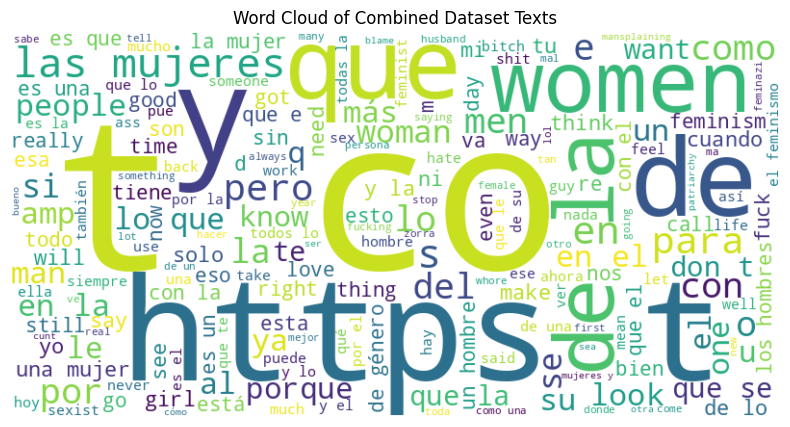

In [ ]:
# Generate a word cloud for the text column in df_combined

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_combined['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Dataset Texts')
plt.show()
